<a href="https://colab.research.google.com/github/IlsuSong/Section1_Project/blob/main/AI_14_%EC%86%A1%EC%9D%BC%EC%88%98_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **다음 분기에 설계해야할 게임의 장르 예측**

파일 업로드

In [1]:
from google.colab import files
files.upload()

Saving vgames2.csv to vgames2.csv


{'vgames2.csv': b'"","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales"\n"1","Candace Kane\'s Candy Factory","DS","2008","Action","Destineer","0.04","0","0","0"\n"2","The Munchables","Wii","2009","Action","Namco Bandai Games","0.17","0","0","0.01"\n"3","Otome wa Oanesama Boku ni Koi Shiteru Portable","PSP","2010","Adventure","Alchemist","0","0","0.02","0"\n"4","Deal or No Deal: Special Edition","DS","2010","Misc","Zoo Games","0.04","0","0","0"\n"5","Ben 10 Ultimate Alien: Cosmic Destruction","PS3","2010","Platform","D3Publisher","0.12","0.09","0","0.04"\n"6","Power Pro Kun Pocket 8","DS","2005","Sports","Konami Digital Entertainment","0","0","0.14","0"\n"7","JASF: Jane\'s Advanced Strike Fighters","PC","2011","Simulation","Deep Silver","0.02","0.01","0","0"\n"8","Samurai Warriors: State of War","PSP","2005","Action","Tecmo Koei","0.07","0","0.11","0.01"\n"9","Imabikisou","PS3","2007","Adventure","Sega","0","0","0.04","0"\n"10","The Penguins of M

In [2]:
import pandas as pd

df=pd.read_csv("vgames2.csv")

In [ ]:
# df.head()

***EDA***

In [3]:
dfc=df.drop(["Unnamed: 0","Publisher"],axis=1) # 분석에 필요없는 feature 제거

dfc.isnull().value_counts() # null값 존재하는 컬럼 찾기

Name   Platform  Year   Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
False  False     False  False  False     False     False     False          16277
                 True   False  False     False     False     False            271
                 False  True   False     False     False     False             50
dtype: int64

In [ ]:
# dfc[dfc.Year.isnull() | dfc.Genre.isnull()]

In [4]:
Year_null=dfc[dfc.Year.isnull()].index # YearNaN

for i in Year_null:          #NaN 데이터
  j=0
  for j in range(16598):   #전체 데이터
    if i==j :
      continue
    elif dfc.iloc[i,0]==dfc.iloc[j,0] : #대조
      dfc.iloc[i,2]=dfc.iloc[j,2]  #변경
      break

In [5]:
Genre_null=dfc[dfc.Genre.isnull()].index # GenreNaN

for i in Genre_null:          #NaN 데이터
  j=0
  for j in range(16598):   #전체 데이터
    if i==j :
      continue
    elif dfc.iloc[i,0]==dfc.iloc[j,0] : #대조
      dfc.iloc[i,3]=dfc.iloc[j,3]  #변경
      break

Year와 Genre의 결측치를 채워넣을 정보가 없는 197개의 데이터가 존재한다.

따라서 데이터 분석 시 Year 혹은 Genre를 요구하는 분석이라면 제거할 필요가 있다.

판매량 column값에는 K, M단위를 가진 데이터와 소수점 둘째자리까지 표기된 숫자들이 있는데,
기본 단위가 million으로 추정된다. 따라서 모든 판매량 데이터를 하나의 기준에 맞춰 수정한다.

In [ ]:
# dfc[dfc['NA_Sales'].str.contains('K')]

In [6]:
dfcc=dfc.copy()
dfcc['NA_Sales']=dfcc['NA_Sales'].str.replace("M",'') # M단위 제거

In [7]:
K=dfcc[dfcc['NA_Sales'].str.contains('K')].index

for i in K:
  dfcc.iloc[i,4]=dfcc.iloc[i,4].replace("K",'')
  if float(dfcc.iloc[i,4])==0 :
    continue
  else :
    dfcc.iloc[i,4]=float(dfcc.iloc[i,4])/1000

# K단위 제거 및 M단위로 변경

In [ ]:
# pd.DataFrame(dfcc.iloc[K,4])

In [8]:
dfcc['EU_Sales']=dfcc['EU_Sales'].str.replace("M",'') # 같은 작업 for EU

K2=dfcc[dfcc['EU_Sales'].str.contains('K')].index

for i in K2:
  dfcc.iloc[i,5]=dfcc.iloc[i,5].replace("K",'')
  if float(dfcc.iloc[i,5])==0 :
    continue
  else :
    dfcc.iloc[i,5]=float(dfcc.iloc[i,5])/1000

In [9]:
dfcc['JP_Sales']=dfcc['JP_Sales'].str.replace("M",'') # 같은 작업 for JP

K3=dfcc[dfcc['JP_Sales'].str.contains('K')].index

for i in K3:
  dfcc.iloc[i,6]=dfcc.iloc[i,6].replace("K",'')
  if float(dfcc.iloc[i,6])==0 :
    continue
  else :
    dfcc.iloc[i,6]=float(dfcc.iloc[i,6])/1000

In [10]:
dfcc['Other_Sales']=dfcc['Other_Sales'].str.replace("M",'') # 같은 작업 for Other

K4=dfcc[dfcc['Other_Sales'].str.contains('K')].index

for i in K4:
  dfcc.iloc[i,7]=dfcc.iloc[i,7].replace("K",'')
  if float(dfcc.iloc[i,7])==0 :
    continue
  else :
    dfcc.iloc[i,7]=float(dfcc.iloc[i,7])/1000

In [11]:
import numpy as np

year_arr=np.array(dfcc.Year.dropna())

yarr=list(set(year_arr))

Year column에 0 to 16, 86, 94 to 98 이라는 값이 존재하는데 0 to 16 은 21세기, 86, 94 to 98은 20세기를 의미하므로 다른 연도 표기와 일치시킨다.

In [12]:
for i in range(16598):
  if dfcc.iloc[i,2]<=16:
    dfcc.iloc[i,2]+=2000
  elif dfcc.iloc[i,2]<=98:
    dfcc.iloc[i,2]+=1900

**Q1 : 지역에 따라서 선호하는 게임 장르가 다를까?**

In [13]:
dfcc['NA_Sales']=dfcc['NA_Sales'].astype(float)
dfcc['EU_Sales']=dfcc['EU_Sales'].astype(float)
dfcc['JP_Sales']=dfcc['JP_Sales'].astype(float)
dfcc['Other_Sales']=dfcc['Other_Sales'].astype(float)

In [14]:
lg=dfcc[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

lgg=lg.groupby(dfcc.Genre).sum()

In [15]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [16]:
import numpy as np

In [17]:
lgg['NA_Sales']=np.log(lgg['NA_Sales'])
lgg['EU_Sales']=np.log(lgg['EU_Sales'])
lgg['JP_Sales']=np.log(lgg['JP_Sales'])
lgg['Other_Sales']=np.log(lgg['Other_Sales'])

In [18]:
sc=StandardScaler()

lggsc=sc.fit_transform(lgg)

lggscdf=pd.DataFrame(lggsc,index=lgg.index,columns=lgg.columns) # 지역별판매량x장르 데이터의 표준화

In [19]:
import seaborn as sb
import matplotlib.pyplot as plt

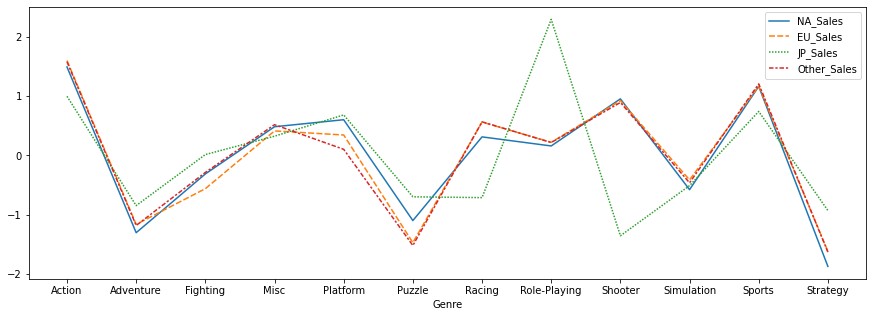

In [20]:
plt.figure(figsize = (15,5))
sb.lineplot(data=lggscdf); # 표준화된 데이터 시각화

전체적으로 비슷한 통계를 나타내지만, 일본에서 특정 장르의 게임의 수요가 다른 지역과 큰 차이를 보인다.

일본은 Role-Playing 게임의 수요가 상대적으로 많고, Racing, Shooter 게임에 대한 수요가 상대적으로 적다.

Action, Sports 게임이 전 지역에서 좋은 지표를 보인다.


**Q2 : 연도별 게임의 트렌드가 있을까?**

In [21]:
nyear_arr=np.array(dfcc.Year.dropna())

nyarr=list(set(nyear_arr))

genre_arr=np.array(dfcc.Genre.dropna())

garr=list(set(genre_arr))

In [22]:
yg=dfcc[['Year','Genre']].dropna()

In [23]:
ygg=yg.groupby(['Year','Genre']).size().unstack(fill_value=0)

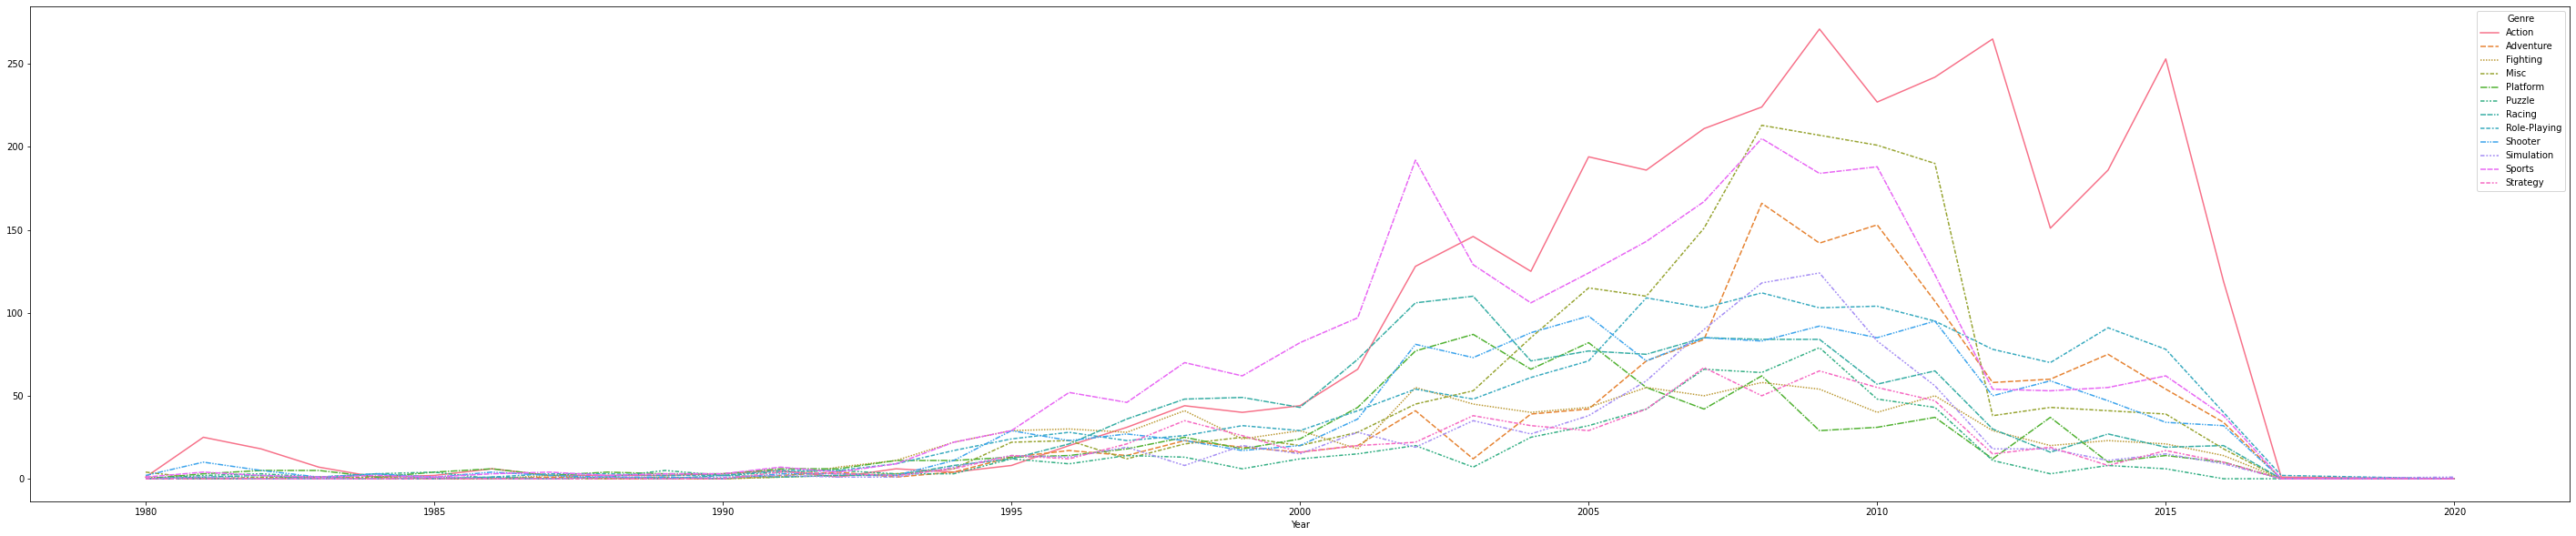

In [24]:
plt.figure(figsize = (50,10))
sb.lineplot(data=ygg)

Action 게임은 시대를 막론하고 항상 상위권의 발매수를 기록했다.

Sports 게임은 90년대 중반부터 꾸준히 발매수가 증가했으며, 2000년대 초반에 최전성기를 이루었고 꾸준히 상위권의 발매수를 유지했다.

Misc 게임은 2010년 전후로 높은 발매수를 기록했으나 이후 급격한 하락세를 보인다.

Role-Playing 게임은 두드러지는 발매수를 기록한 연도는 없지만 다른 장르의 게임이 하락세를 겪을때도 꾸준히 유지했다.

**@ 출고량이 높은 게임에 대한 분석 및 시각화**

In [64]:
bsdf1=dfcc[['Name','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

bsdf1['SUM'] =dfcc['NA_Sales']+dfcc['EU_Sales']+dfcc['JP_Sales']+dfcc['Other_Sales'] 

bsdf1=bsdf1.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)

bsdf1=bsdf1.groupby(['Name','Genre']).sum()

bsdf1=bsdf1.sort_values(by='SUM', ascending=False)

bsdf1.reset_index(drop=False,inplace=False)

bsdf1.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,,SUM
Name,Genre,
Wii Sports,Sports,82.74
Grand Theft Auto V,Action,55.92
Super Mario Bros.,Platform,45.31
Tetris,Puzzle,35.84
Mario Kart Wii,Racing,35.83
Wii Sports Resort,Sports,33.00
Pokemon Red/Pokemon Blue,Role-Playing,31.38
Call of Duty: Black Ops,Shooter,31.04
Call of Duty: Modern Warfare 3,Shooter,30.84


In [58]:
bsdf2=bsdf1.head(10)

bsdf2=bsdf2.reset_index()

bsdf2=bsdf2.drop('Genre',axis=1)

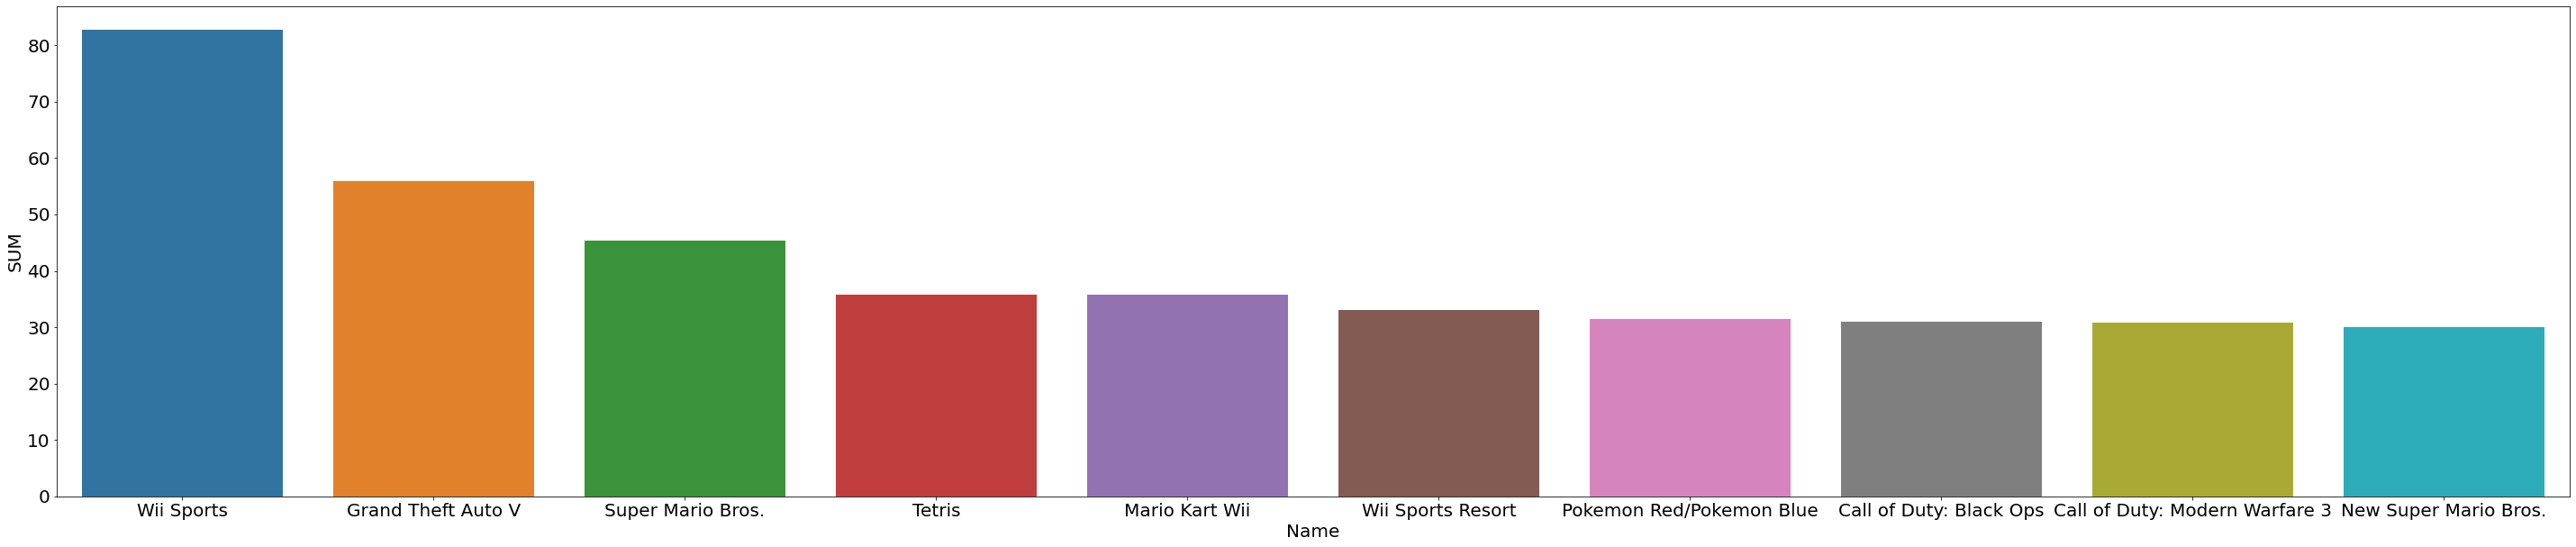

In [62]:
plt.figure(figsize = (50,10))
plt.rc('font', size=20)
sb.barplot(x='Name',y='SUM',data=bsdf2);

Wii Sports가 압도적인 판매량을 가지고 있고, 그 뒤를 Grand Theft Auto V, Super Mario Bros.가 잇는다.

Sports, Action, Platform, Puzzle, Racing, Role-Playing, Shooter 게임이 상위 10위에 포함돼있다.

**@ 어떤 플랫폼으로 게임을 만들어야 하는가**

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,0.05,0.05,0.25,0.03
